<a href="https://colab.research.google.com/github/trantoan62/AI-ANN-TranQuocToan/blob/main/2ndDegreesRoboticArm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#l1 = 10, l2 = 40, l3 = 20

In [ ]:
# bài 4: robot 2 bậc tự do oxy như sgk l1 = 50, l2 = 40, tt1, tt2. -> theta 1, theta 2, px, py 
# px = l1.cos(tt1) +l2.cos(tt1+tt2)
# py = l1.sin(tt1) +l2.sin(tt1+tt2)
# tạo 1 data động học thuận xài hàm for -> nhờ training bằng kq động học thuận

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [31]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [32]:
l1 = 10
l2 = 40
px = []
py= []
tt1 =[]
tt2 =[]

In [33]:
for i in np.arange(0, 360, 1):
    for j in np.arange(0, 360, 1):
      x = l1*np.cos(np.radians(i)) + l2*np.cos(np.radians(i+j))
      y = l1*np.sin(np.radians(i)) + l2*np.sin(np.radians(i+j))
      px.append(x)
      py.append(y)
      tt1.append(i)
      tt2.append(j)

In [34]:
Px = np.array([px])
Py = np.array([py])
Tt1= np.array([tt1])
Tt2 = np.array([tt2])

In [35]:
Tt1 = Tt1.astype('float32')
Tt2 = Tt2.astype('float32')

In [36]:
Tt1 /= 360
Tt2 /= 360

In [37]:
result = np.concatenate((Tt1.T, Tt2.T),axis =1)
train = np.concatenate((Px.T, Py.T),axis =1)
result.shape

(129600, 2)

In [38]:
x_train = result[0:90720,:]
y_train = train[0:90720,:]
x_test = result[90720:129600,:]
y_test = train[90720:129600,:]

In [39]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(2,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               1536      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 265,218
Trainable params: 265,218
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss = ['mae'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [42]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(x_test,y_test))

Epoch 1/50
709/709 [==============================] - 8s 11ms/step - loss: 0.4162 - accuracy: 0.9942 - val_loss: 11.2612 - val_accuracy: 0.9222
Epoch 2/50
709/709 [==============================] - 7s 10ms/step - loss: 0.3756 - accuracy: 0.9956 - val_loss: 10.6547 - val_accuracy: 0.9270
Epoch 3/50
709/709 [==============================] - 8s 11ms/step - loss: 0.3548 - accuracy: 0.9965 - val_loss: 9.9841 - val_accuracy: 0.9301
Epoch 4/50
709/709 [==============================] - 8s 11ms/step - loss: 0.3586 - accuracy: 0.9971 - val_loss: 9.4252 - val_accuracy: 0.9401
Epoch 5/50
709/709 [==============================] - 9s 12ms/step - loss: 0.3273 - accuracy: 0.9972 - val_loss: 9.0423 - val_accuracy: 0.9380
Epoch 6/50
709/709 [==============================] - 8s 11ms/step - loss: 0.3261 - accuracy: 0.9972 - val_loss: 8.7919 - val_accuracy: 0.9414
Epoch 7/50
709/709 [==============================] - 8s 11ms/step - loss: 0.2896 - accuracy: 0.9976 - val_loss: 8.3995 - val_accuracy: 0.94

In [43]:
Score = model.evaluate(x_test,y_test,verbose = 1)

1215/1215 [==============================] - 4s 3ms/step - loss: 6.4274 - accuracy: 0.9421


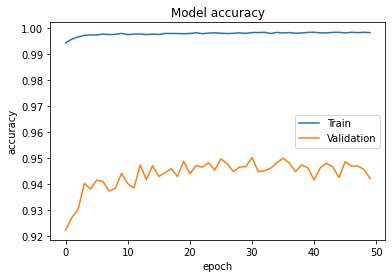

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc ='center right')
plt.show()

In [45]:
model.save('2ndDegreesRoboticArm.h5')

In [46]:
y_pred = model.predict(x_train)